In [1]:
# %qtconsole

In [2]:
# imports
import pickle as pkl
from joblib import load
#
from modulePreProcessing import TransformationMethods, FeatureMethods

In [3]:
# class instances
fm = FeatureMethods()

In [4]:
# Retrieve dataframes from EDA_PreProcessing

pathFileName_nrm = 'dataframes/df_nrm.joblib'
with open(pathFileName_nrm, 'rb') as f:
    df_nrm = load(f)
print(type(df_nrm))

pathFileName_std = 'dataframes/df_std.joblib'
with open(pathFileName_std, 'rb') as f:
    df_std = load(f)
print(type(df_std))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


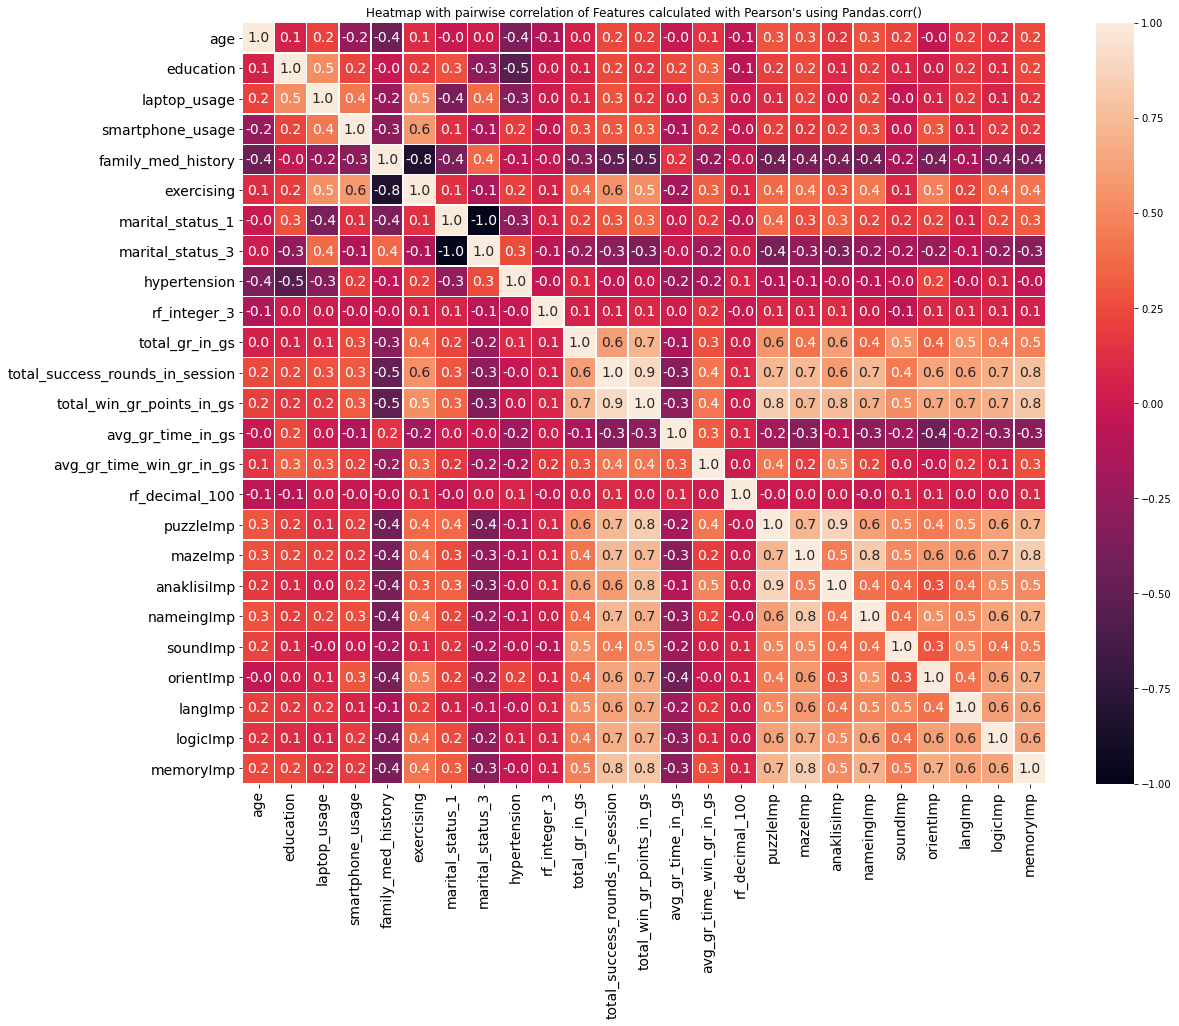

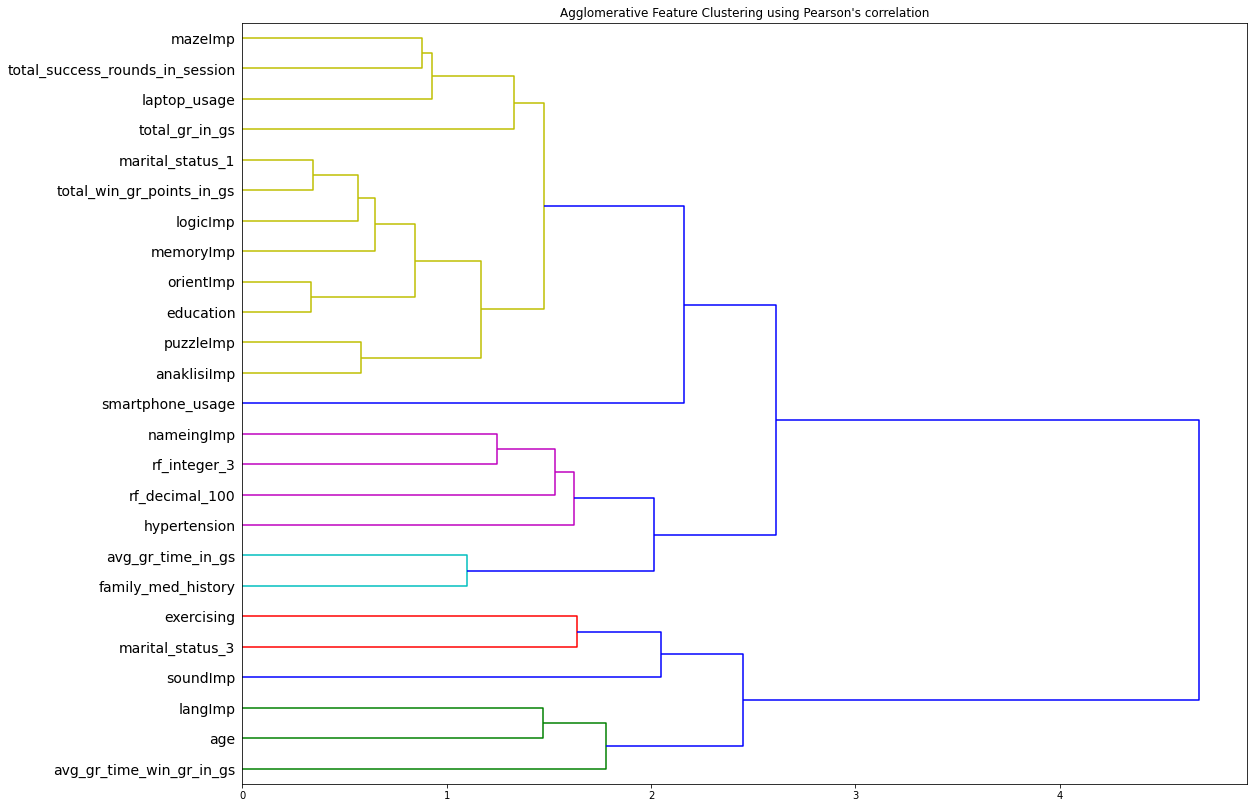

In [5]:
# Feature correlation inspection.
# We want to select features highly correlated to the target class and not correlated between them.
fs = ['age', 'education','laptop_usage', 'smartphone_usage', 'family_med_history', 'exercising', 'marital_status_1',
      'marital_status_3', 'hypertension', 'rf_integer_3', 'total_gr_in_gs', 'total_success_rounds_in_session', 'total_win_gr_points_in_gs', 
      'avg_gr_time_in_gs', 'avg_gr_time_win_gr_in_gs', 'rf_decimal_100', 
      'puzzleImp', 'mazeImp', 'anaklisiImp', 'nameingImp', 'soundImp', 'orientImp', 'langImp', 'logicImp', 'memoryImp']
dictionary_of_clusters = fm.correlation_inspection(df_std, fs, 0.38)

In [6]:
all_features = ['age', 'education','laptop_usage', 'smartphone_usage', 'family_med_history', 'exercising',
                'marital_status_1', 'marital_status_3', 'hypertension', 
                'total_gr_in_gs', 'total_success_rounds_in_session', 'total_win_gr_points_in_gs', 
                'avg_gr_time_in_gs', 'avg_gr_time_win_gr_in_gs', 'rf_integer_3', 'rf_decimal_100',
                'puzzleImp', 'mazeImp', 'anaklisiImp', 'nameingImp', 'soundImp', 'orientImp', 'langImp', 
                'logicImp', 'memoryImp']
session_features = ['total_gr_in_gs', 'total_success_rounds_in_session', 'total_win_gr_points_in_gs', 
                'avg_gr_time_in_gs', 'avg_gr_time_win_gr_in_gs', 'rf_integer_3', 'rf_decimal_100',
                'puzzleImp', 'mazeImp', 'anaklisiImp', 'nameingImp', 'soundImp', 'orientImp', 'langImp', 
                'logicImp', 'memoryImp']

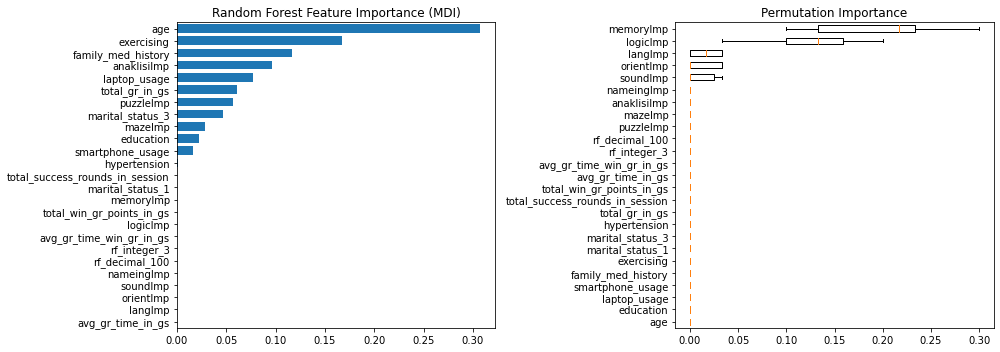

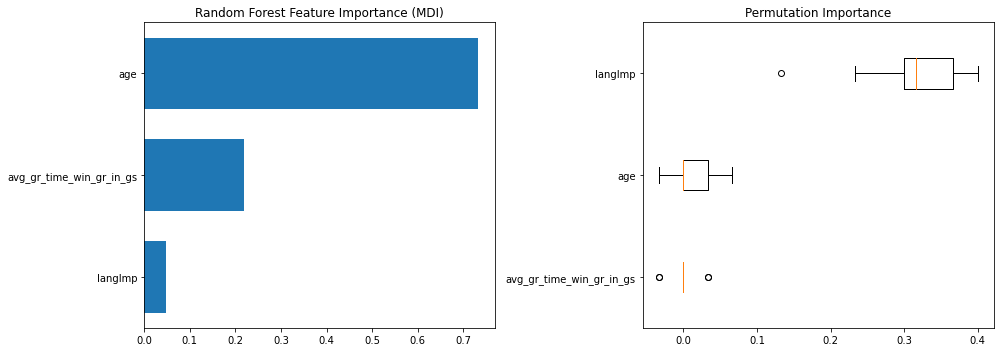

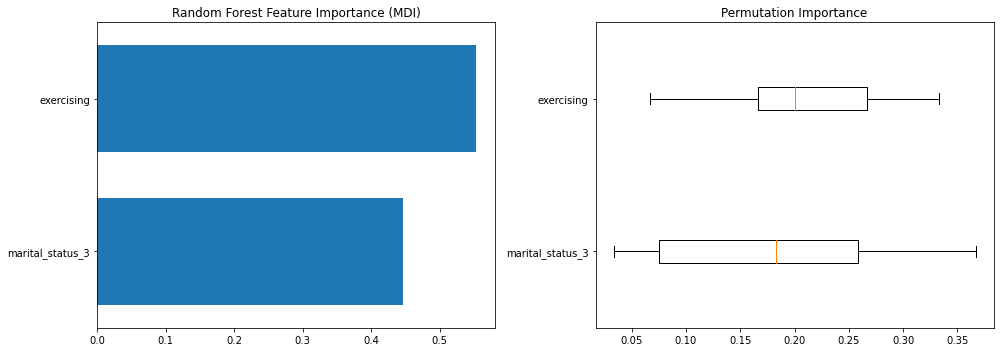

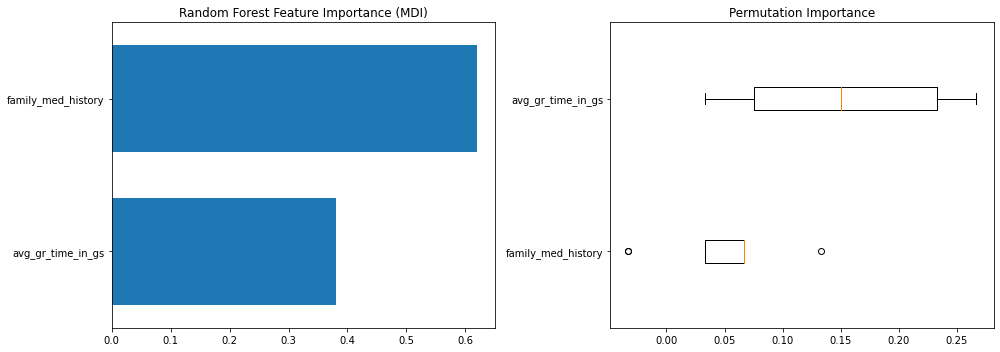

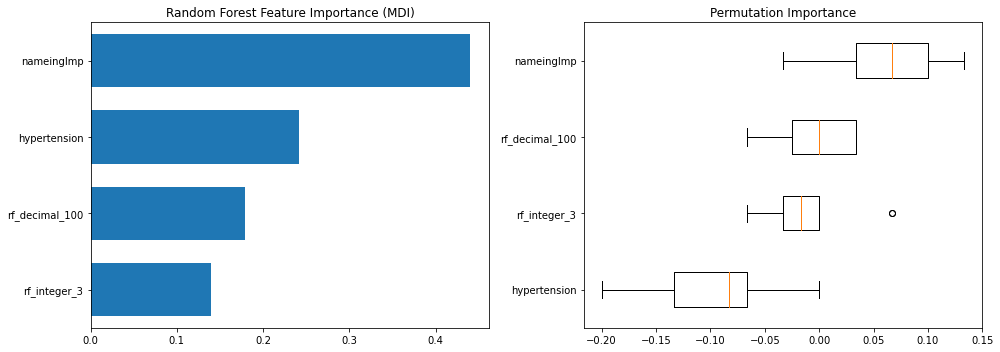

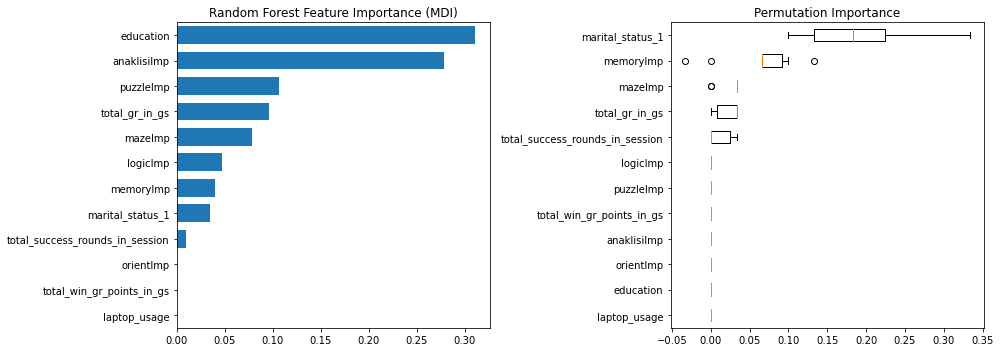

In [7]:
# feature importance inspection using a classifier
# Mean Decrease in Impurity (MDI) feature importance
# Permutation importance of feature values

fm.inspection_using_classifier(df_std, all_features)
for key in dictionary_of_clusters:
    if len(dictionary_of_clusters[key])>1:
        fm.inspection_using_classifier(df_std, dictionary_of_clusters[key])

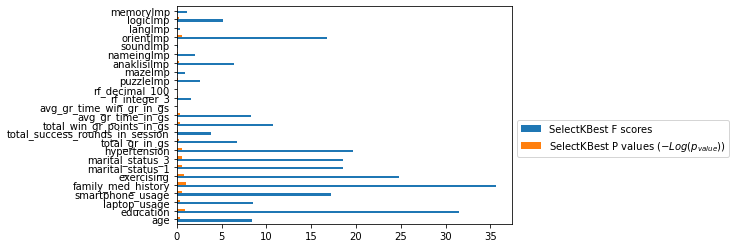

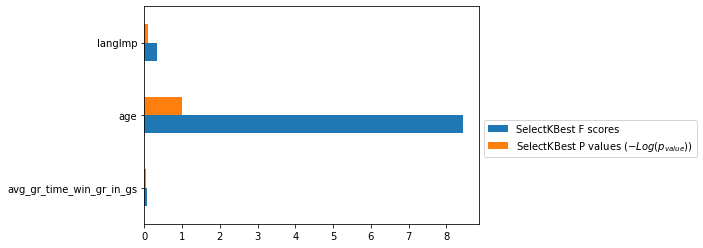

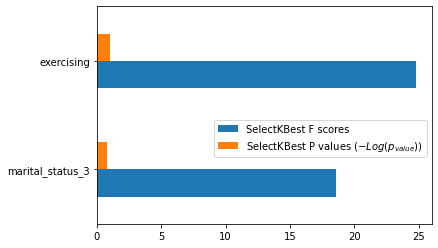

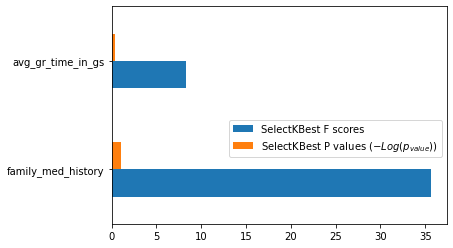

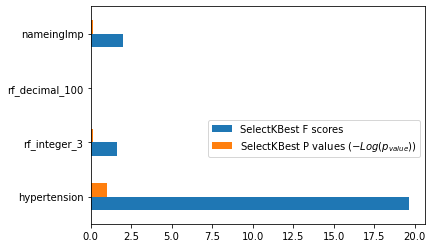

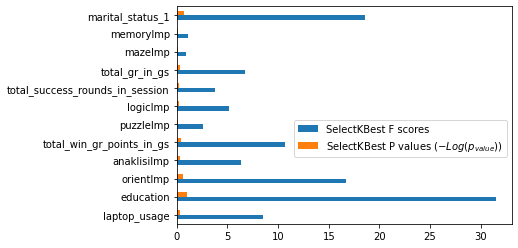

In [8]:
# Feature importance inspection using Univariate Feature Selection
num_of_ideal_features_to_select = 9
selected_kbest = fm.inspection_using_regressors(df_nrm, all_features, num_of_ideal_features_to_select)
for key in dictionary_of_clusters:
    if len(dictionary_of_clusters[key])>1:
        fm.inspection_using_regressors(df_nrm, dictionary_of_clusters[key], 'all')

In [9]:
print('selected_kbest:', selected_kbest)

selected_kbest: ['education', 'smartphone_usage', 'family_med_history', 'exercising', 'marital_status_1', 'marital_status_3', 'hypertension', 'total_win_gr_points_in_gs', 'orientImp']
